# Data

I decided to use city population as a metric for my city list and the list of most populated European cities can be easily reached from Wikipedia. In this section, these cities and their coordinates will be listed as dataframe and they will be shown on the map.

In [88]:
import numpy as np
import pandas as pd

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

!conda install -c conda-forge folium=0.5.0 --yes
import folium 

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



In [89]:
df=pd.read_html('https://en.wikipedia.org/wiki/List_of_European_cities_by_population_within_city_limits')[0]

In [90]:
df_cities = pd.DataFrame(columns=['city', 'latitude', 'longitude'])
df_cities['city'] = df['City']
df_cities['latitude'] = ''
df_cities['longitude'] = ''


In [91]:
df_cities

,city,latitude,longitude
0,Istanbul (entirely)[a],,
1,Moscow[b],,
2,London,,
3,Saint Petersburg,,
4,Berlin,,
5,Madrid,,
6,Kyiv,,
7,Rome,,
8,Paris,,
9,Minsk,,


City names look good except the first two. Since it is easy to change, I will change it manually. Also, just for curiosity, I would like to add Amsterdam as well.

In [92]:
df_cities['city'][0]='Istanbul'
df_cities['city'][1]='Moscow'
df_cities = df_cities.append({'city': 'Amsterdam'}, ignore_index=True)


In [93]:
df_cities

,city,latitude,longitude
0,Istanbul,,
1,Moscow,,
2,London,,
3,Saint Petersburg,,
4,Berlin,,
5,Madrid,,
6,Kyiv,,
7,Rome,,
8,Paris,,
9,Minsk,,


City names look good now. We can add their coordinates

In [94]:
for i in range(len(df_cities['city'])):
    address = df_cities['city'][i]
    geolocator = Nominatim(user_agent="europe_explorer")
    location = geolocator.geocode(address)
    df_cities['latitude'][i] = location.latitude
    df_cities['longitude'][i] = location.longitude
    

In [95]:
df_cities


,city,latitude,longitude
0,Istanbul,41.0096,28.9652
1,Moscow,55.7504,37.6175
2,London,51.5073,-0.127647
3,Saint Petersburg,59.9387,30.3162
4,Berlin,52.517,13.3889
5,Madrid,40.4167,-3.70358
6,Kyiv,50.45,30.5241
7,Rome,41.8933,12.4829
8,Paris,48.8567,2.35146
9,Minsk,53.9023,27.5619


In [96]:
geolocator = Nominatim(user_agent="europe_explorer")
location = geolocator.geocode('Sofia, Bulgaria')
print(location.latitude)
print(location.longitude)

42.6978634
23.3221789


In [97]:
df_cities['latitude'][23] = location.latitude
df_cities['longitude'][23] = location.longitude

In [98]:
df_cities

,city,latitude,longitude
0,Istanbul,41.0096,28.9652
1,Moscow,55.7504,37.6175
2,London,51.5073,-0.127647
3,Saint Petersburg,59.9387,30.3162
4,Berlin,52.517,13.3889
5,Madrid,40.4167,-3.70358
6,Kyiv,50.45,30.5241
7,Rome,41.8933,12.4829
8,Paris,48.8567,2.35146
9,Minsk,53.9023,27.5619


In [99]:


address = 'Europe'
geolocator = Nominatim(user_agent="eu_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Europe are {}, {}.'.format(latitude, longitude))

# create map of Toronto using latitude and longitude values
map_europe = folium.Map(location=[latitude, longitude], zoom_start=4)

# add markers to map
for lat, lng, label in zip(df_cities['latitude'], df_cities['longitude'], df_cities['city']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_europe)  
    
map_europe

The geograpical coordinate of Europe are 51.0, 10.0.


Github does not support Leaflet, therefore I add SS of the resulting map.

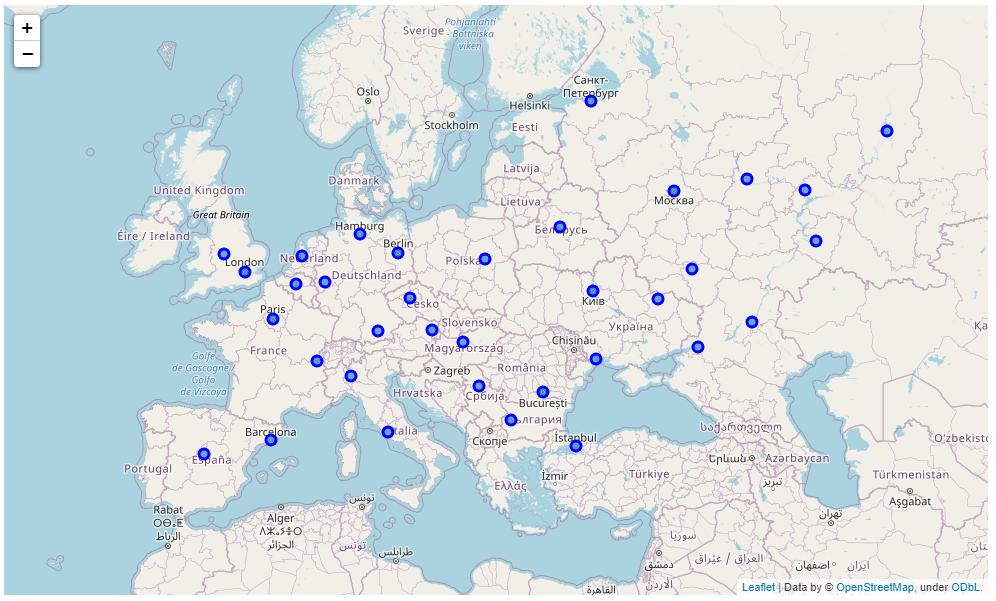

In [100]:
from IPython.display import Image
Image("europe.png")

The samples look equally distributed and suitable for clustering. Therefore, I will continue with this dataset.